#### problem statement
“Build a Machine Learning system that predicts whether a stock’s closing price will increase or decrease the next day, based on its recent trading data, and visualize the predictions through an interactive web interface.”

## Preprocessing

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv('/content/ADANIPORTS.csv')

In [48]:
df.sample(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3170,2020-09-18,ADANIPORTS,EQ,346.10,348.7,359.8,347.10,359.10,357.85,355.48,4963128,1.764295e+14,56741.0,1867503,0.3763
313,2009-03-09,MUNDRAPORT,EQ,309.80,305.4,313.4,295.00,295.85,297.90,304.43,98733,3.005725e+12,NaN,43512,0.4407
2998,2020-01-13,ADANIPORTS,EQ,392.05,391.9,393.9,389.30,390.05,390.35,391.24,1516112,5.931678e+13,19174.0,497886,0.3284
748,2010-12-09,MUNDRAPORT,EQ,141.50,142.1,144.1,136.55,138.50,137.75,139.41,781461,1.089446e+13,NaN,425374,0.5443
2634,2018-07-17,ADANIPORTS,EQ,360.05,361.1,369.2,360.80,366.00,366.70,365.36,1775116,6.485531e+13,35550.0,443563,0.2499


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [50]:
df.shape

(3322, 15)

In [51]:
df.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [52]:
# converting date into datetime
df['Date'] = pd.to_datetime(df['Date'])


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3322 non-null   int64       

In [54]:
# sorting the value based on symbol and date
df = df.sort_values(['Symbol', 'Date']).reset_index(drop=True)


In [55]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [56]:
# droping the unnecessary
df = df.drop(columns=['Series'],axis=1)


In [57]:
df.columns

Index(['Date', 'Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close',
       'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [58]:
# hadeling missing value
df.isnull().sum()

,0
Date,0
Symbol,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [59]:
# handeling missing values
df.fillna(method='ffill', inplace=True)  # Forward fill
df.dropna(inplace=True)  # Drop remaining if any


/tmp/ipython-input-1804432832.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [60]:
df.isnull().sum()

,0
Date,0
Symbol,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [61]:
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2012-01-17,ADANIPORTS,135.5,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327,0.6138
1,2012-01-18,ADANIPORTS,140.0,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925,0.4547
2,2012-01-19,ADANIPORTS,141.7,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545,0.4955
3,2012-01-20,ADANIPORTS,149.4,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145,0.5270
4,2012-01-23,ADANIPORTS,155.4,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653,0.4951


In [62]:
# Target = 1 if next day Close > today Close, else 0.
# .shift(-1) moves the column up by 1 row within each group.
df['Target'] = (df.groupby('Symbol')['Close'].shift(-1) > df['Close']).astype(int)


In [63]:
# Drop last row per symbol
df = df.dropna(subset=['Target'])


In [64]:
df.shape

(3322, 15)

In [65]:
df.dtypes

,0
Date,datetime64[ns]
Symbol,object
Prev Close,float64
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
VWAP,float64
Volume,int64


In [66]:
# reset index and drop duplicates
df = df.drop_duplicates(subset=['Symbol','Date']).reset_index(drop=True)


## EDA

In [67]:
new_df=df.copy()

In [68]:
new_df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Target
0,2012-01-17,ADANIPORTS,135.5,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327,0.6138,1
1,2012-01-18,ADANIPORTS,140.0,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925,0.4547,1
2,2012-01-19,ADANIPORTS,141.7,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545,0.4955,1
3,2012-01-20,ADANIPORTS,149.4,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145,0.5270,0
4,2012-01-23,ADANIPORTS,155.4,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653,0.4951,1


In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Prev Close          3322 non-null   float64       
 3   Open                3322 non-null   float64       
 4   High                3322 non-null   float64       
 5   Low                 3322 non-null   float64       
 6   Last                3322 non-null   float64       
 7   Close               3322 non-null   float64       
 8   VWAP                3322 non-null   float64       
 9   Volume              3322 non-null   int64         
 10  Turnover            3322 non-null   float64       
 11  Trades              3322 non-null   float64       
 12  Deliverable Volume  3322 non-null   int64         
 13  %Deliverble         3322 non-null   float64     

In [70]:
new_df.shape

(3322, 15)

In [71]:
new_df.dtypes

,0
Date,datetime64[ns]
Symbol,object
Prev Close,float64
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
VWAP,float64
Volume,int64


- Univariate Analysis

In [72]:
new_df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Target
0,2012-01-17,ADANIPORTS,135.5,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327,0.6138,1
1,2012-01-18,ADANIPORTS,140.0,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925,0.4547,1
2,2012-01-19,ADANIPORTS,141.7,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545,0.4955,1
3,2012-01-20,ADANIPORTS,149.4,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145,0.5270,0
4,2012-01-23,ADANIPORTS,155.4,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653,0.4951,1


In [73]:
new_df.columns

Index(['Date', 'Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close',
       'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Target'],
      dtype='object')

In [74]:
num_cols =['Date', 'Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close',
       'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Target']


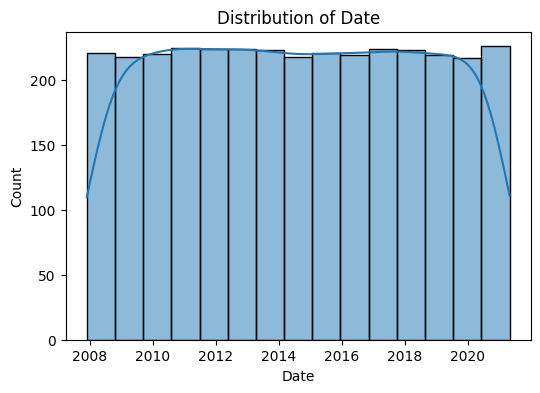

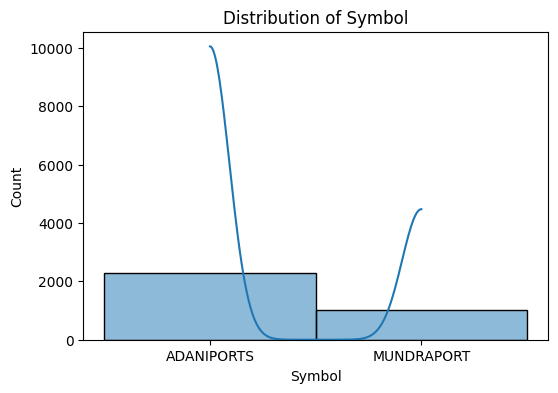

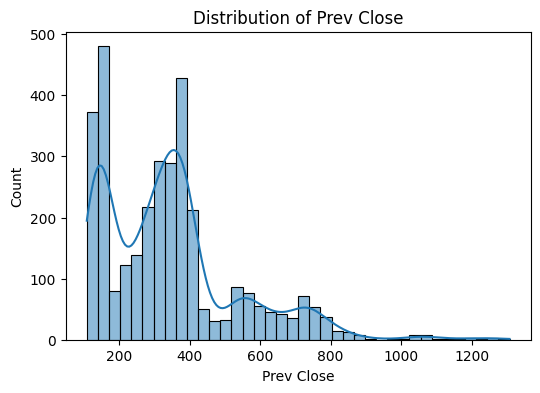

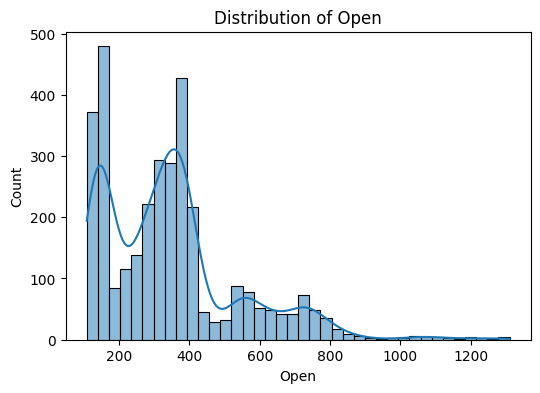

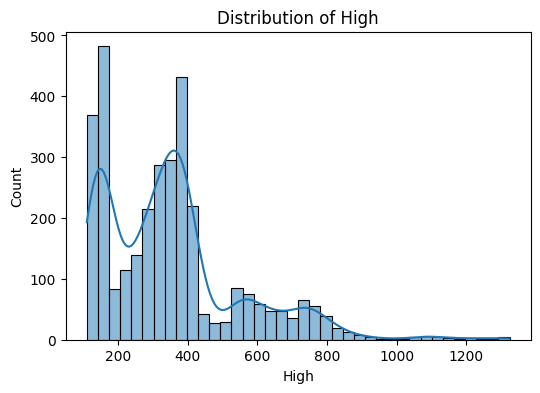

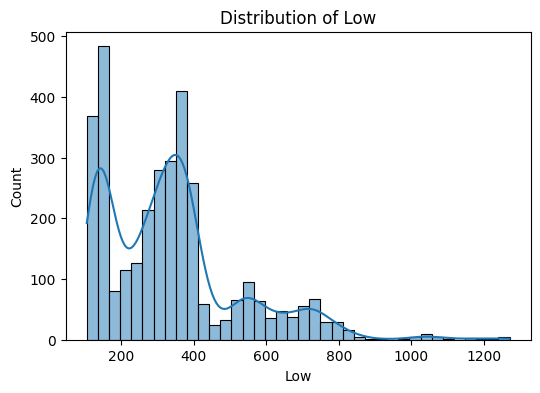

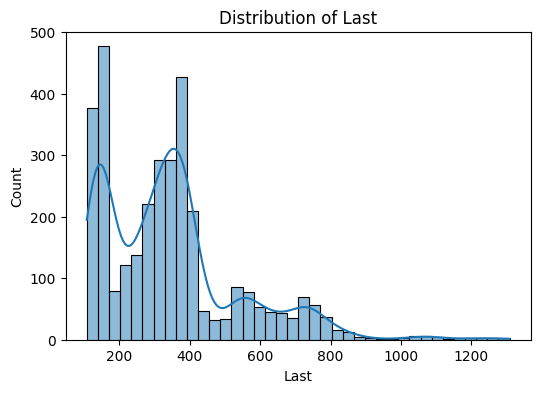

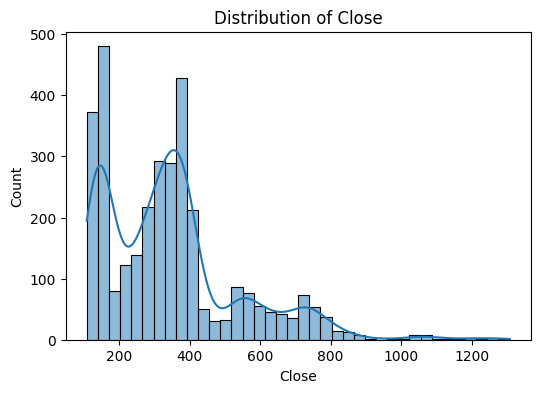

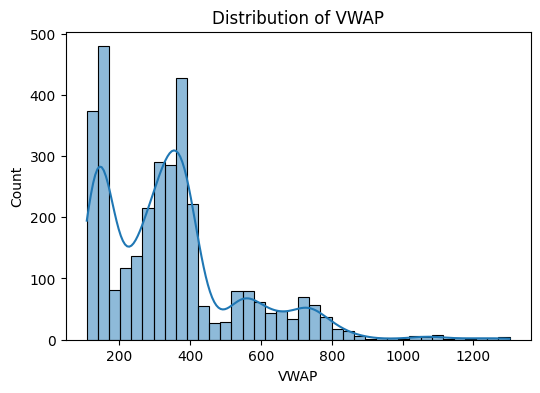

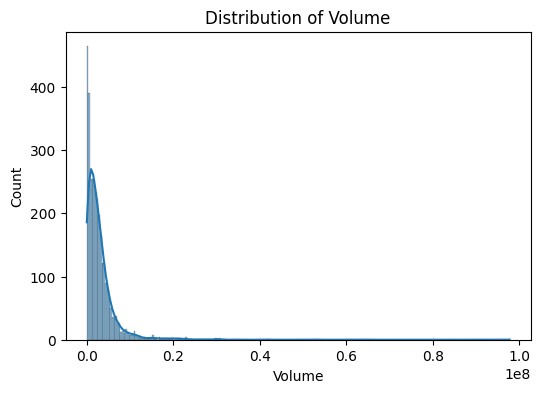

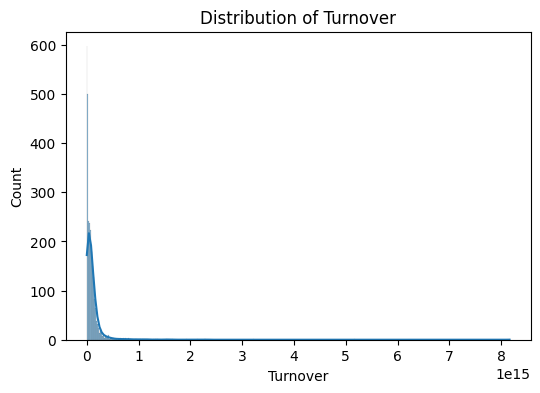

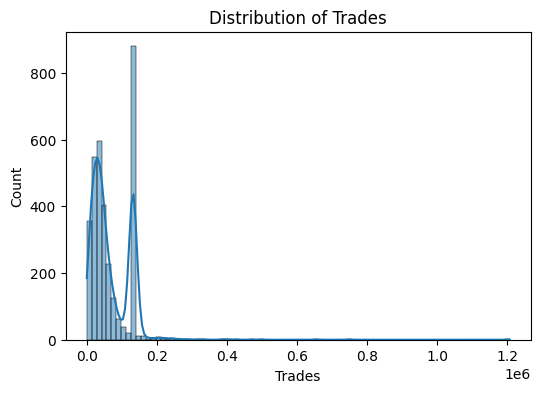

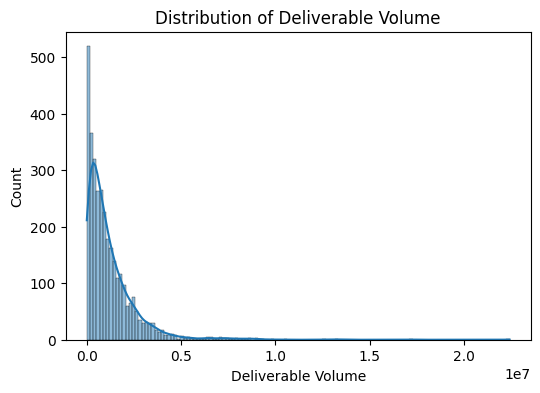

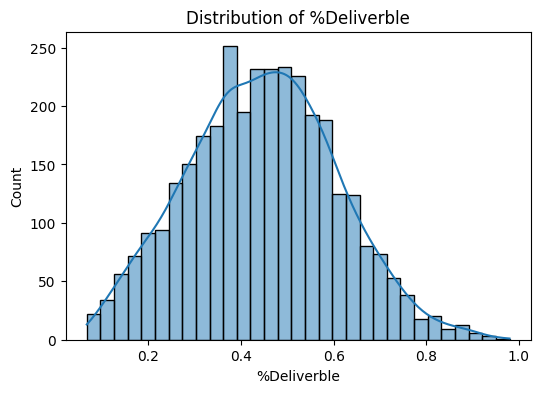

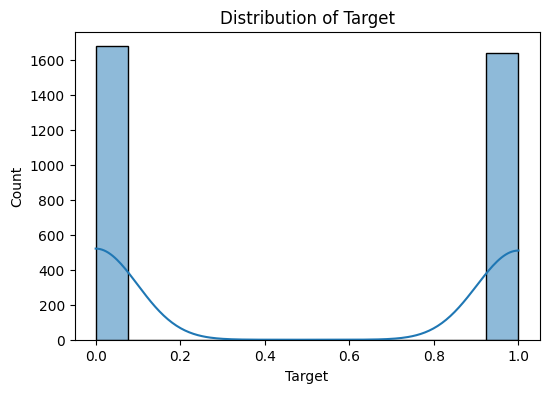

In [75]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    # volume column is truely skewed

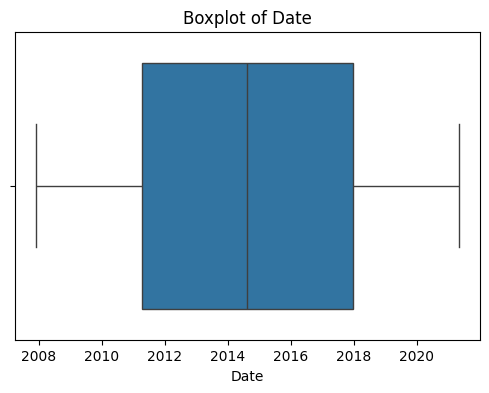

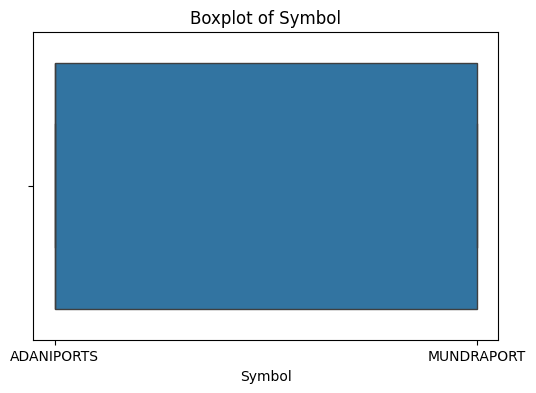

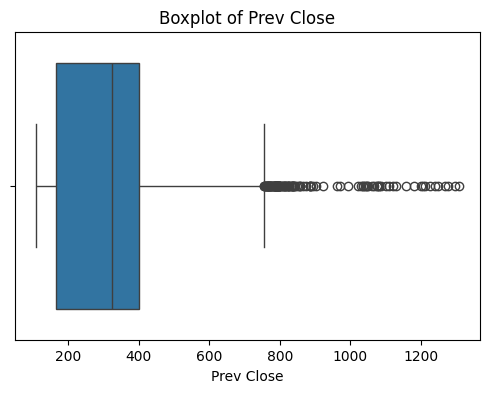

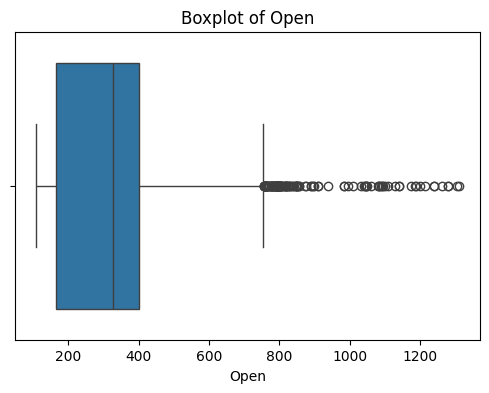

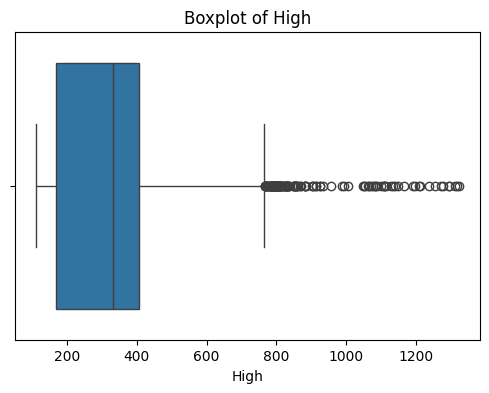

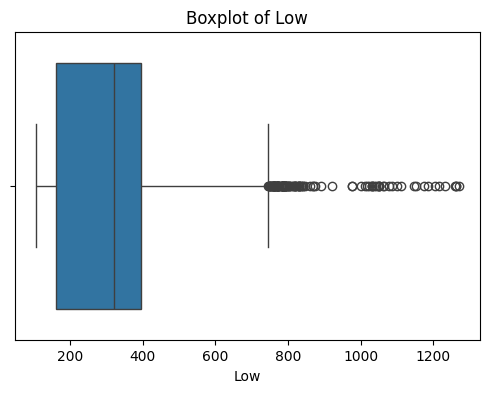

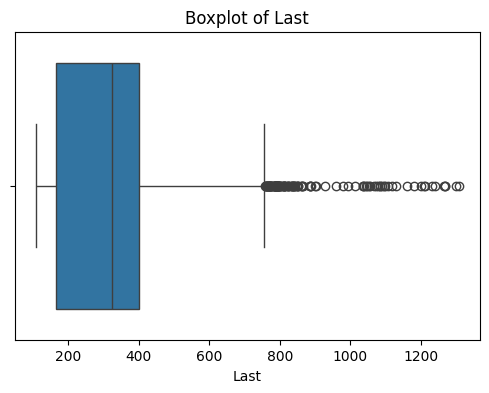

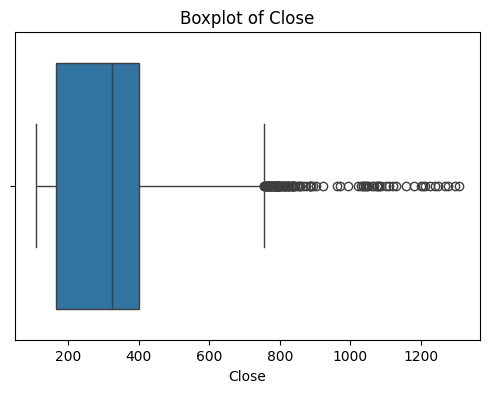

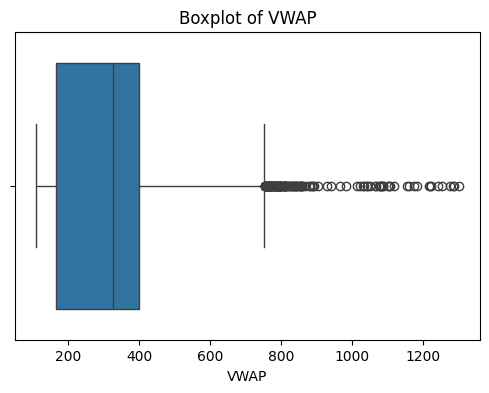

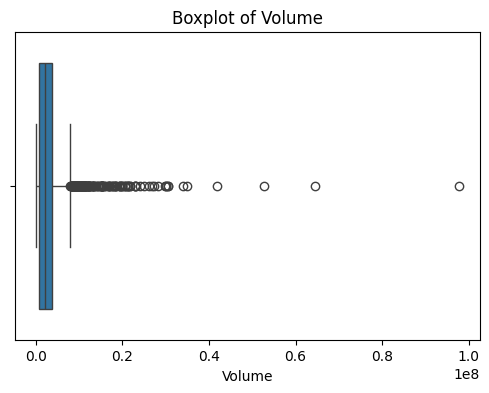

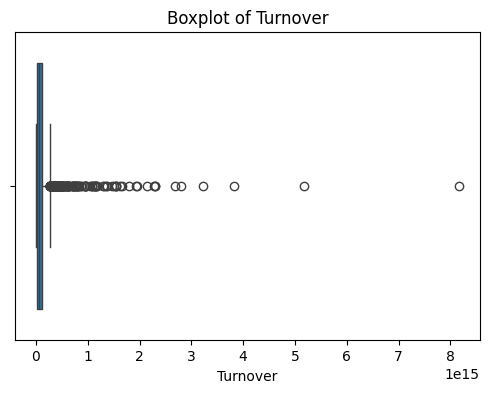

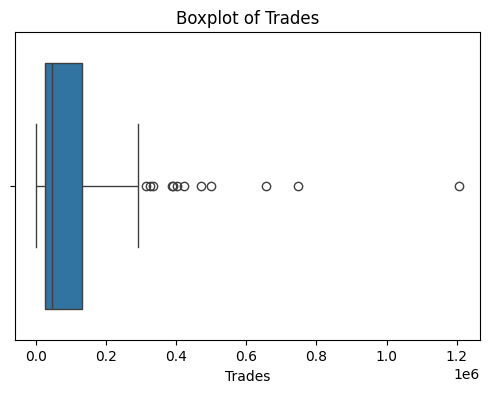

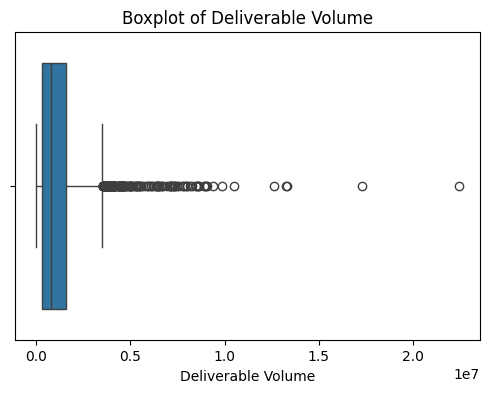

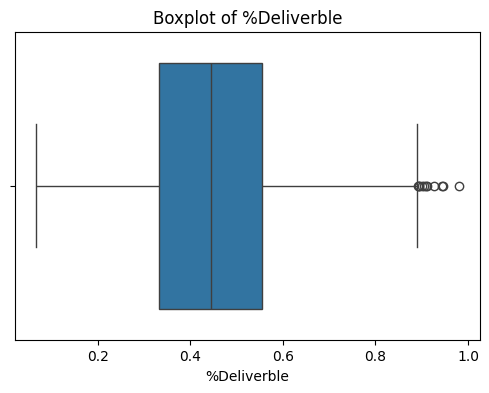

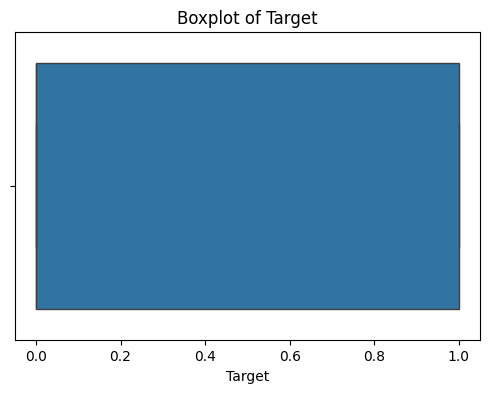

In [76]:
# outliers
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [77]:
df[num_cols].describe()


,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Target
count,3322,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03,3322.000000,3322.000000
mean,2014-08-14 03:47:08.416616448,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,6.765924e+04,1.207441e+06,0.445899,0.494582
min,2007-11-27 00:00:00,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000,0.000000
25%,2011-04-07 06:00:00,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.643650e+04,3.212005e+05,0.332900,0.000000
50%,2014-08-06 12:00:00,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,4.677050e+04,8.132775e+05,0.445650,0.000000
75%,2017-12-18 18:00:00,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,1.321410e+05,1.605528e+06,0.555850,1.000000
max,2021-04-30 00:00:00,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800,1.000000
std,NaN,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.772142e+04,1.398640e+06,0.160496,0.500046


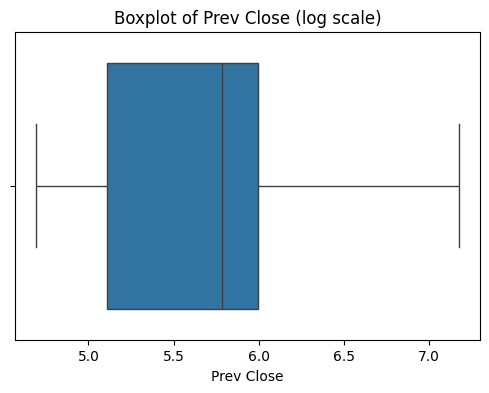

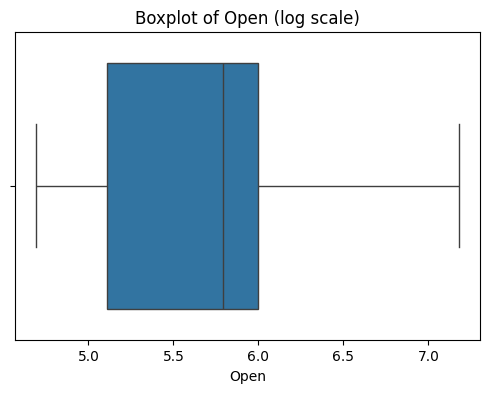

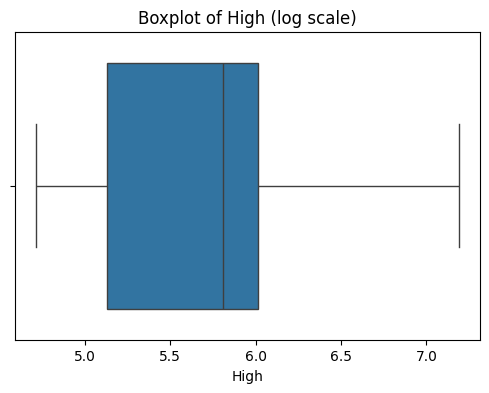

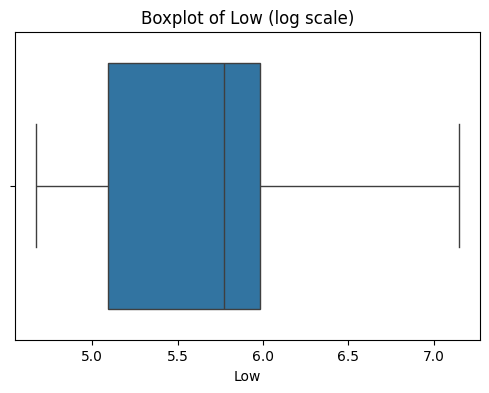

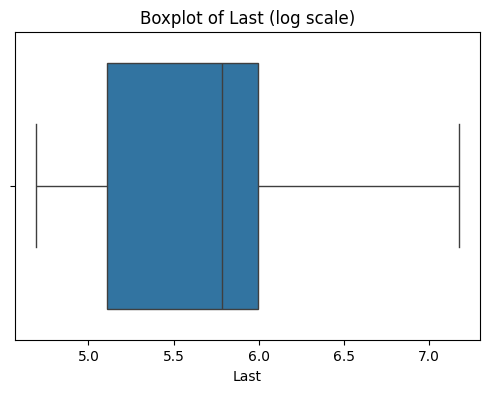

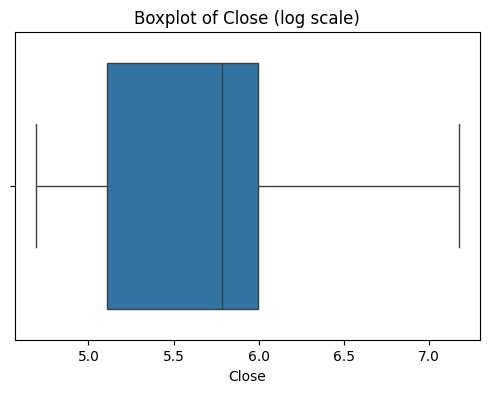

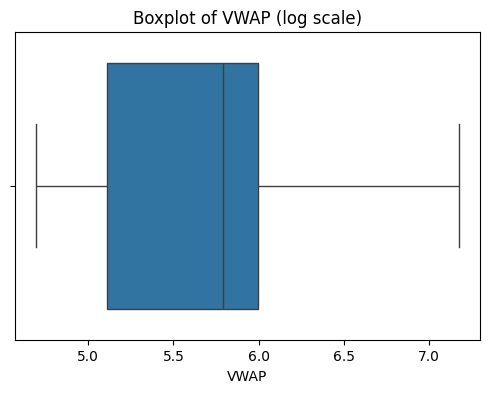

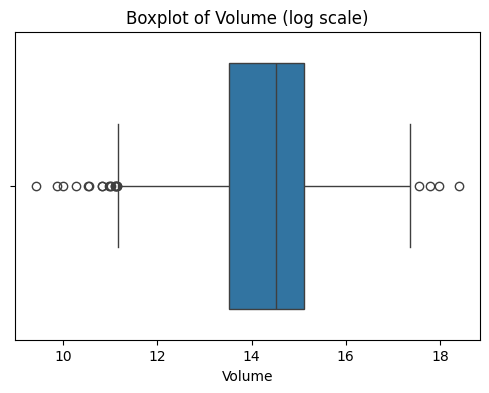

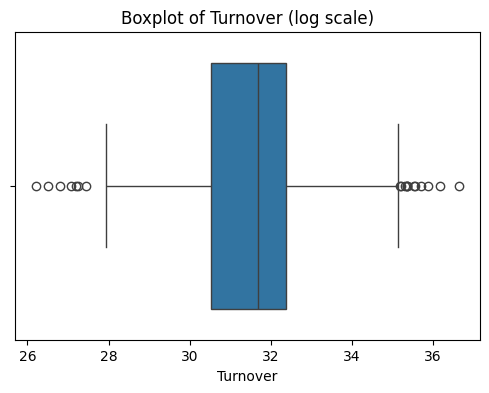

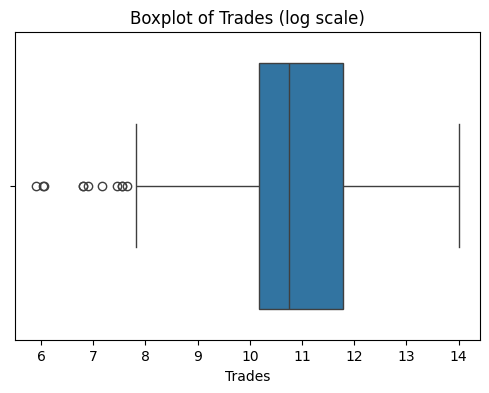

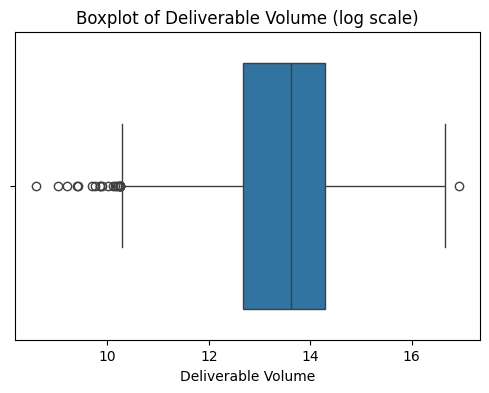

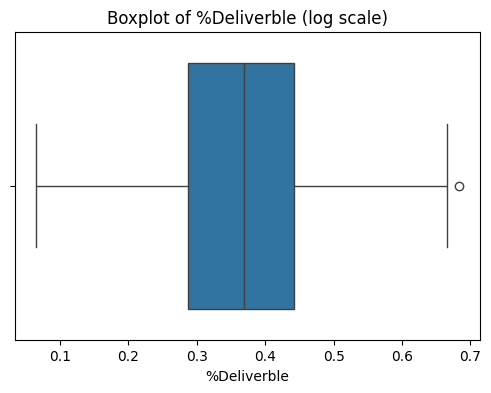

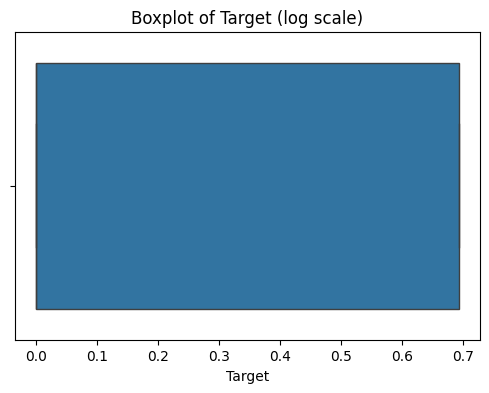

In [78]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=np.log1p(df[col]))
    plt.title(f'Boxplot of {col} (log scale)')
    plt.show()


- Bivariate Analysis

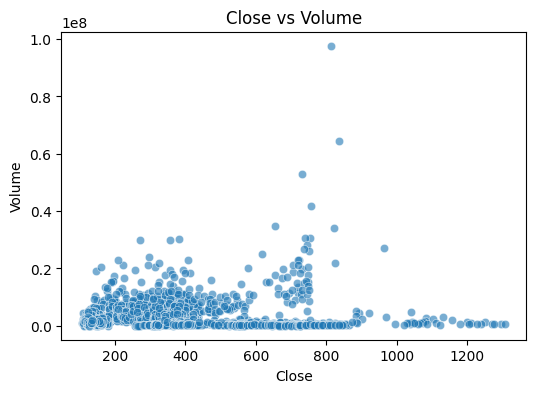

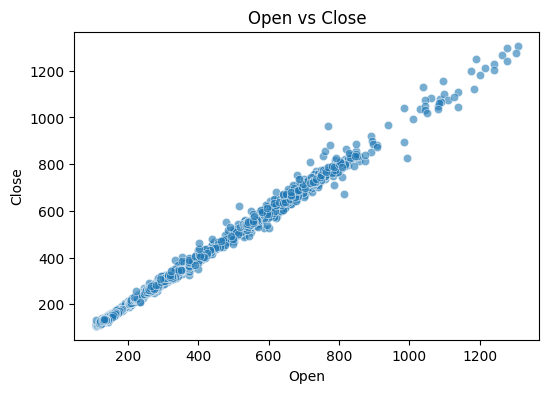

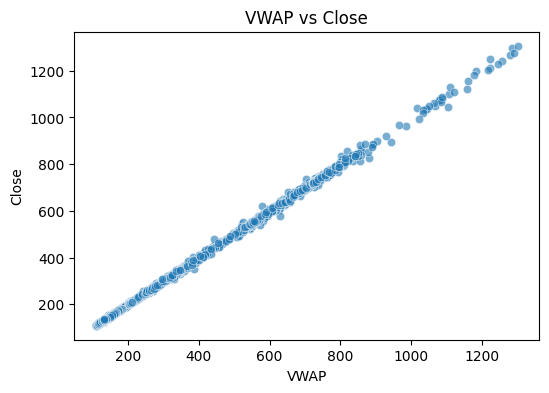

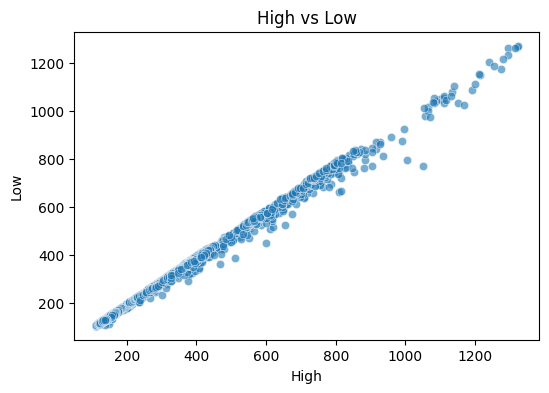

In [79]:
# numeric vs numeric
import seaborn as sns
import matplotlib.pyplot as plt

# select numeric columns
num_cols = ['Prev Close','Open','High','Low','Close','VWAP','Volume']

# Scatter plots between key numeric pairs
pairs = [
    ('Close', 'Volume'),
    ('Open', 'Close'),
    ('VWAP', 'Close'),
    ('High', 'Low')
]

for x_col, y_col in pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=x_col, y=y_col, data=df, alpha=0.6)
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()







In [80]:
# Correlation between each selected pair
for x_col, y_col in pairs:
    corr = df[x_col].corr(df[y_col])
    print(f'Correlation between {x_col} and {y_col}: {corr:.3f}')

Correlation between Close and Volume: 0.066
Correlation between Open and Close: 0.998
Correlation between VWAP and Close: 1.000
Correlation between High and Low: 0.998


In [81]:
new_df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Target
0,2012-01-17,ADANIPORTS,135.5,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327,0.6138,1
1,2012-01-18,ADANIPORTS,140.0,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925,0.4547,1
2,2012-01-19,ADANIPORTS,141.7,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545,0.4955,1
3,2012-01-20,ADANIPORTS,149.4,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145,0.5270,0
4,2012-01-23,ADANIPORTS,155.4,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653,0.4951,1


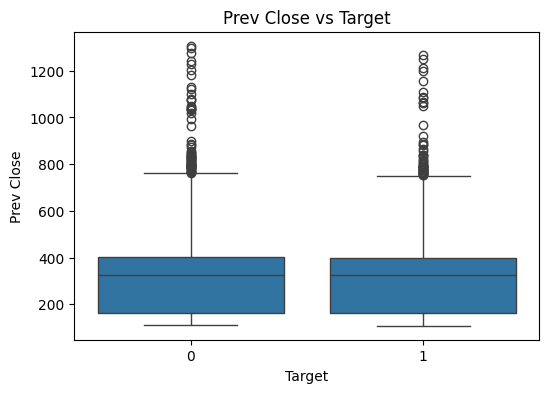

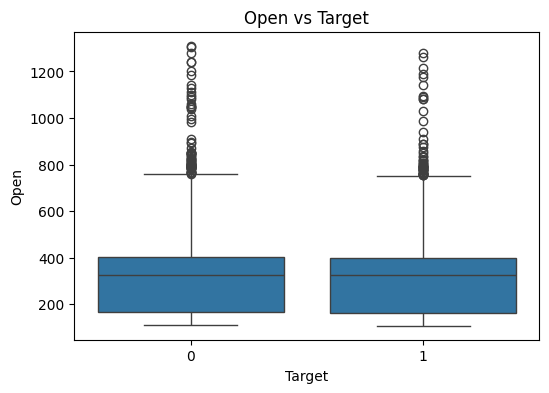

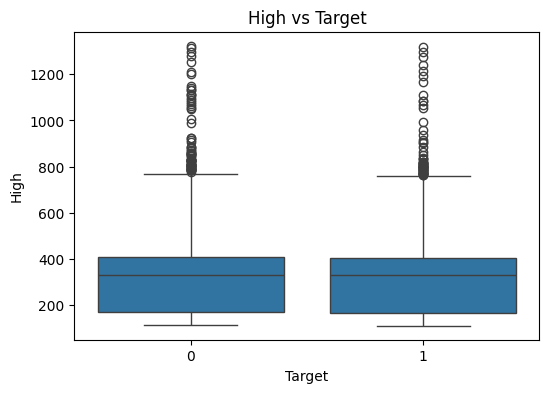

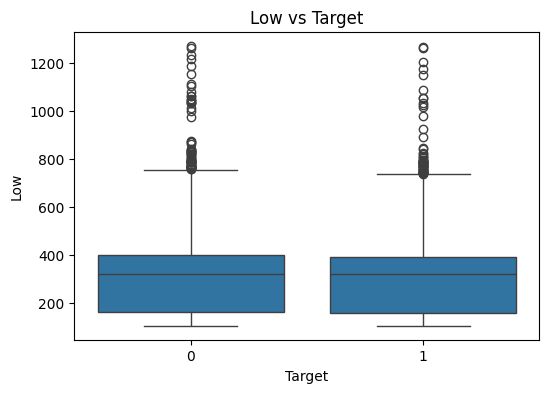

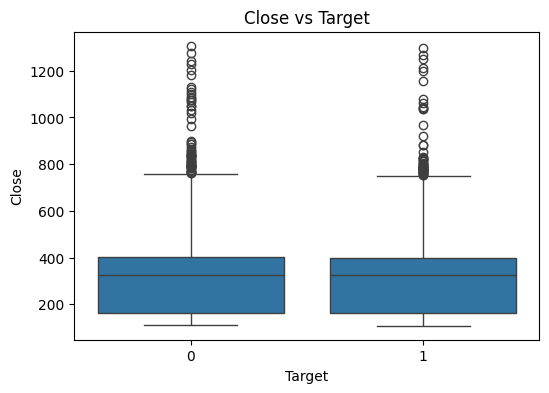

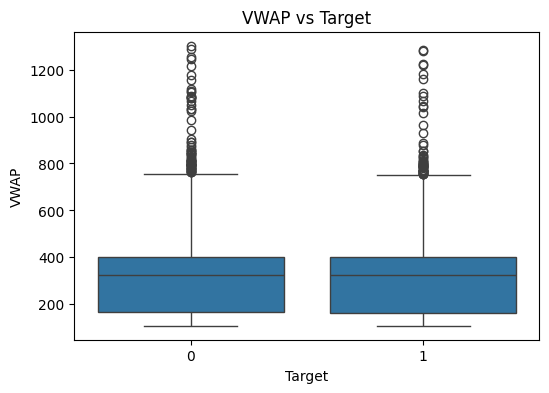

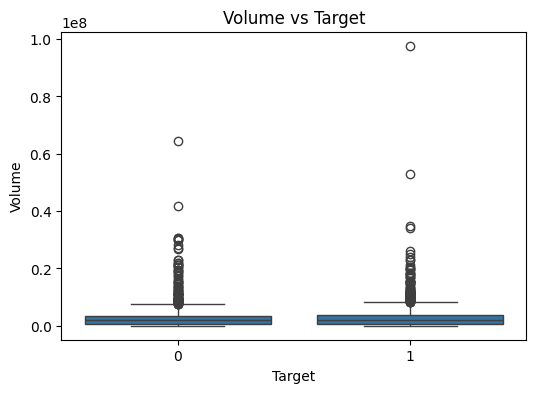

In [82]:
# numeric vs categorical
cat_col = 'Target'

# Boxplots for each numeric column vs Target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=cat_col, y=col, data=df)
    plt.title(f'{col} vs {cat_col}')
    plt.show()



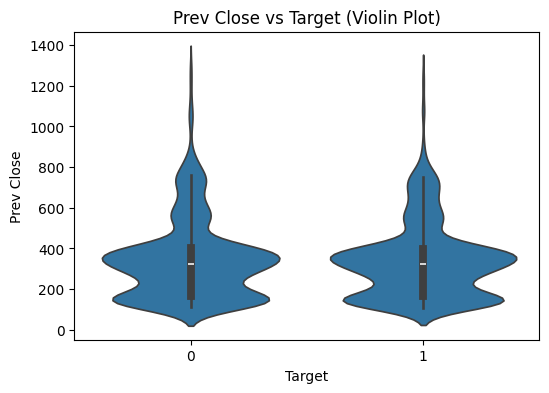

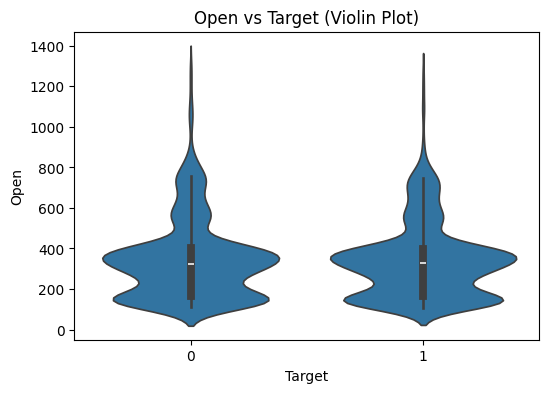

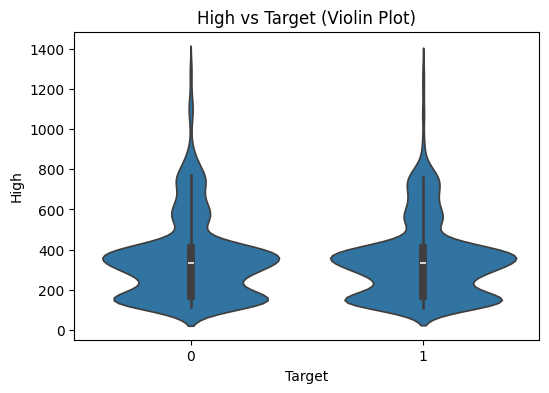

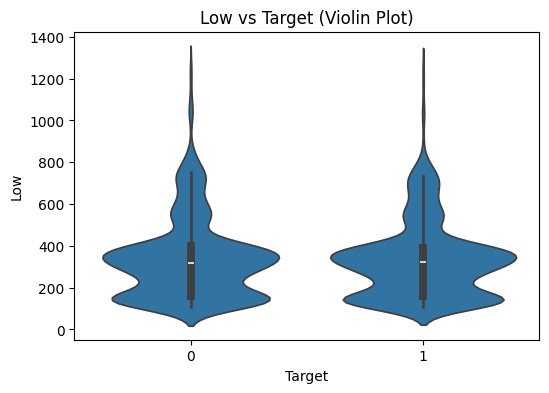

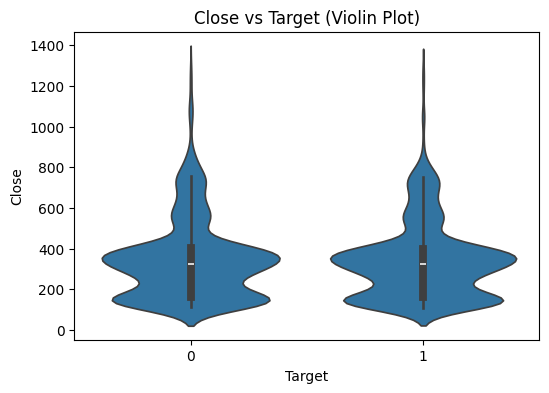

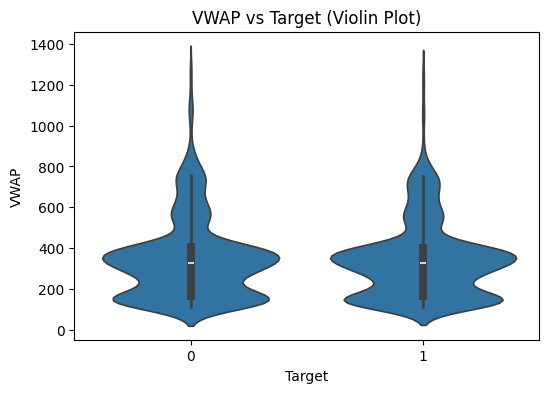

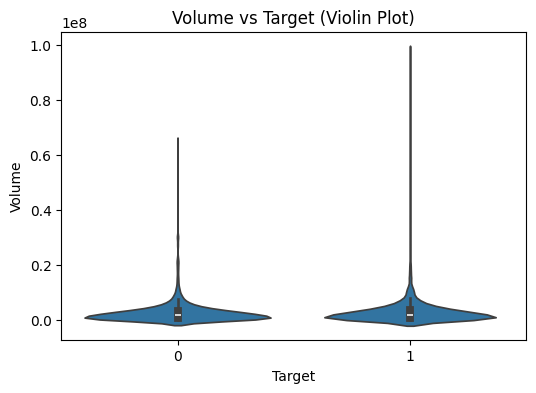

In [83]:
#  Violin plots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x=cat_col, y=col, data=df)
    plt.title(f'{col} vs {cat_col} (Violin Plot)')
    plt.show()

- Multivariate Analysis

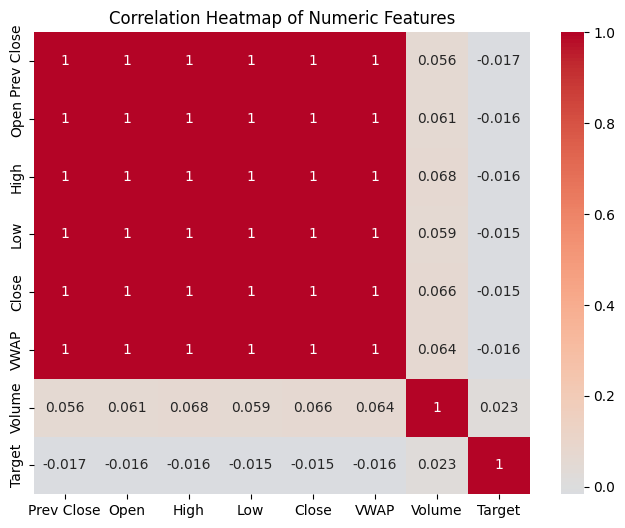

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
num_cols = ['Prev Close','Open','High','Low','Close','VWAP','Volume','Target']

# Compute correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


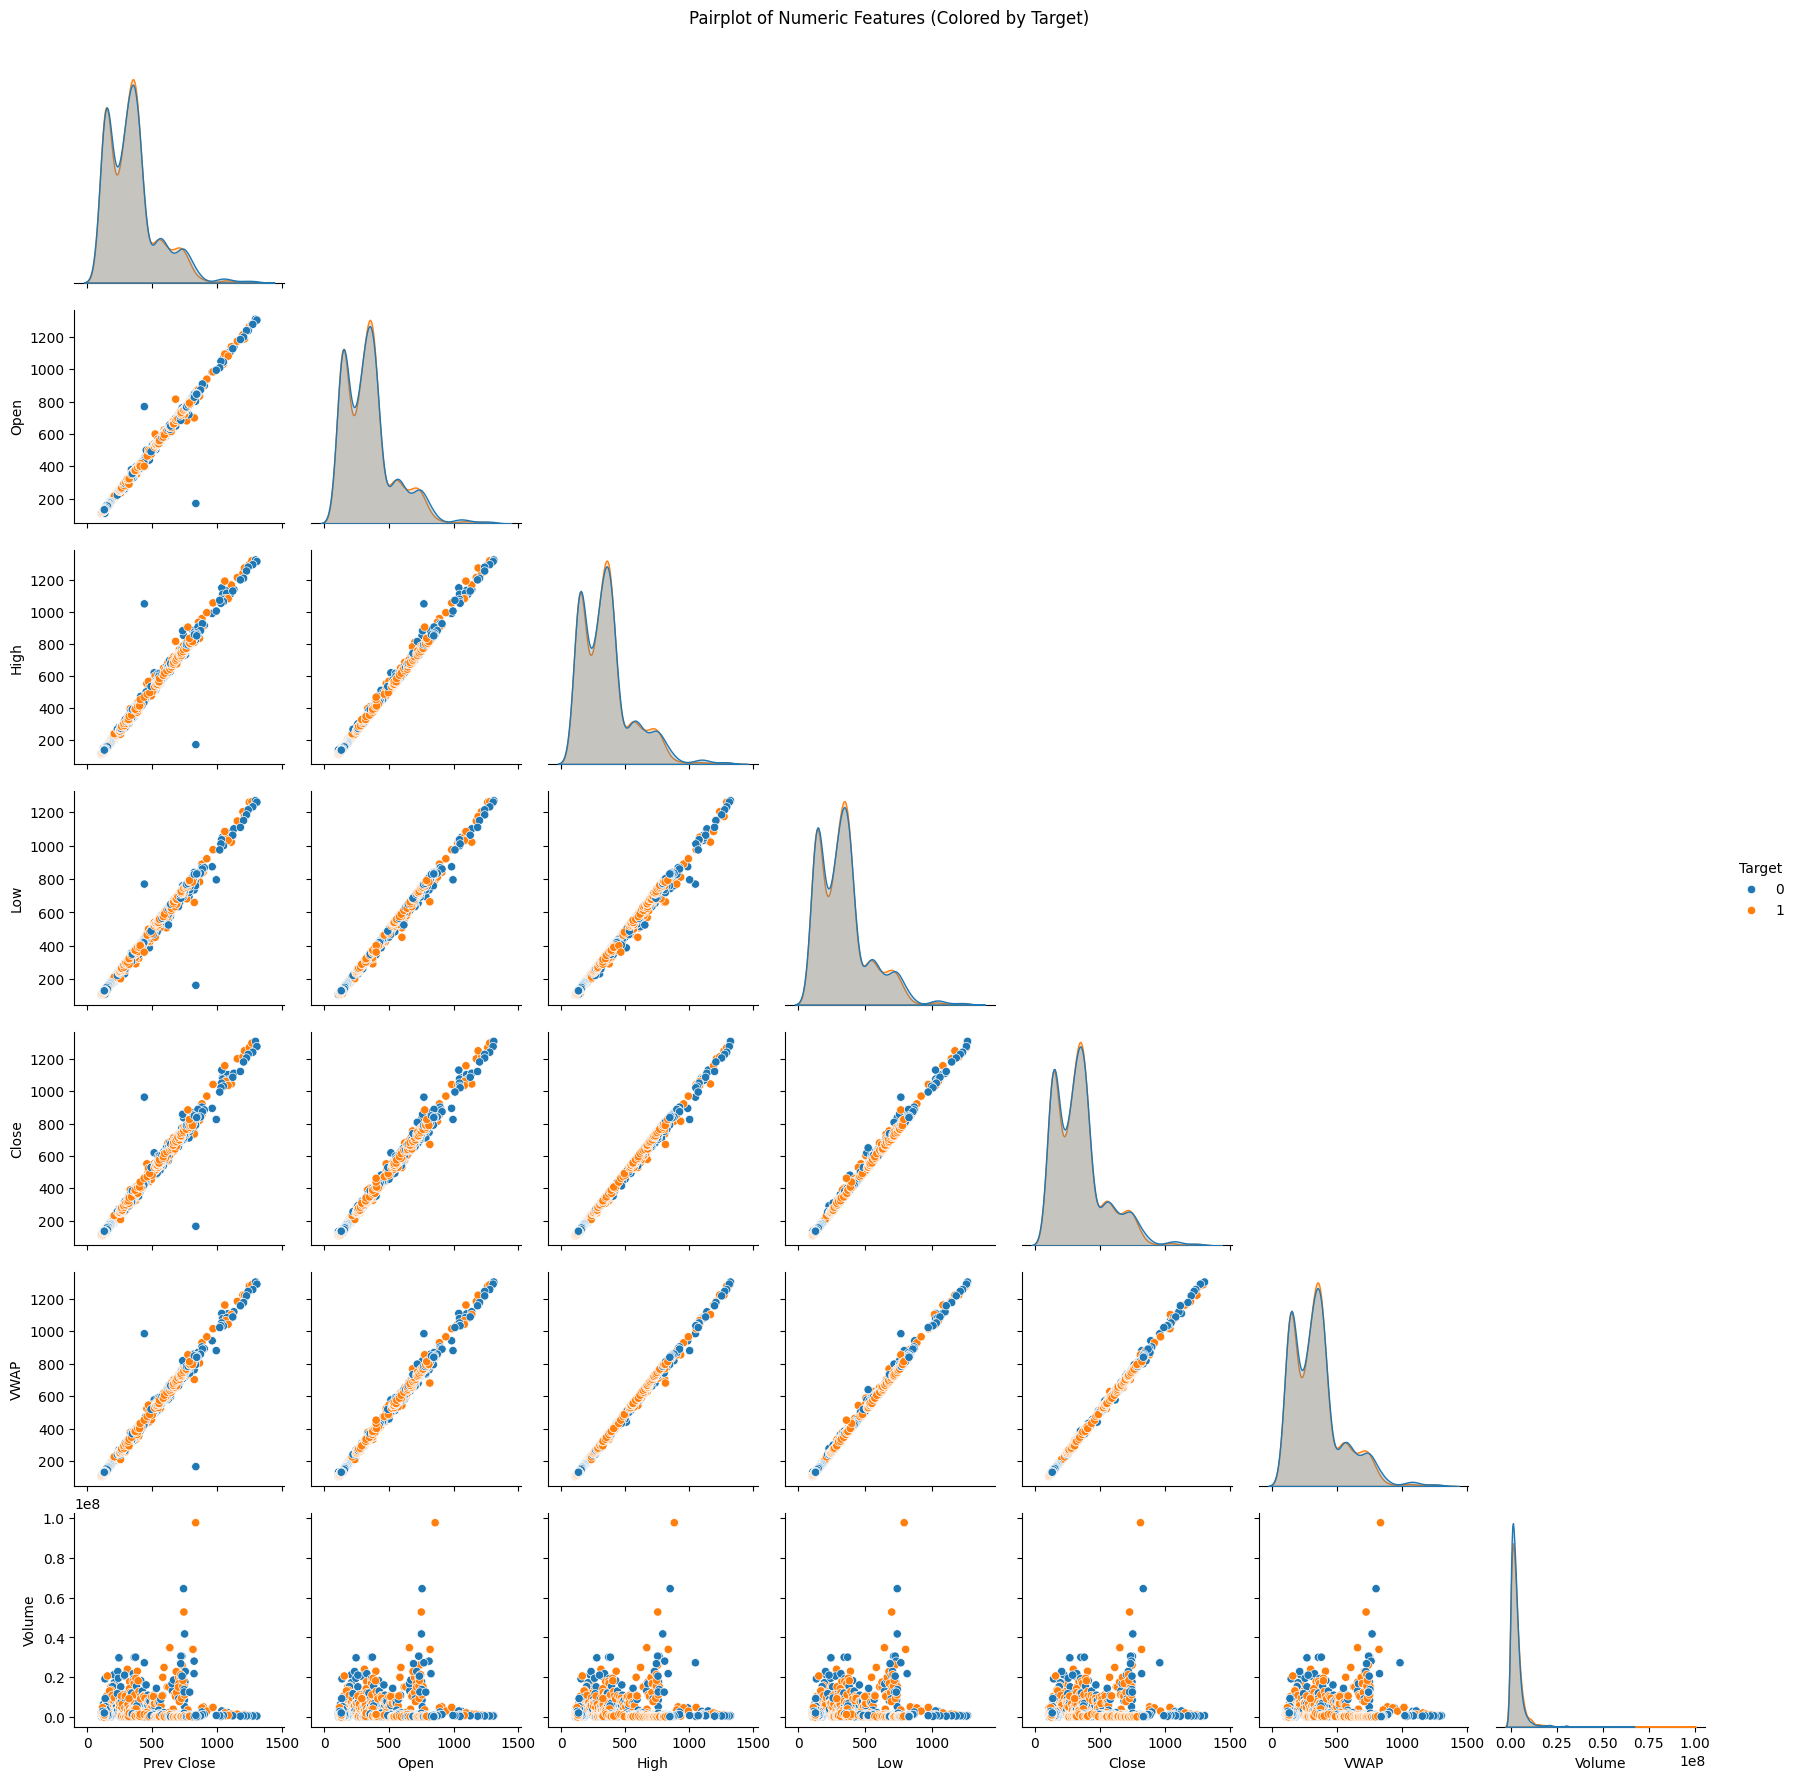

In [85]:
sns.pairplot(df[num_cols], hue='Target', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numeric Features (Colored by Target)', y=1.02)
plt.show()


## Feature Engineering

In [97]:
num_cols = [
    'Prev Close', 'Open', 'High', 'Low', 'Last',
    'Close', 'VWAP', 'Volume', 'Turnover',
    'Trades', 'Deliverable Volume', '%Deliverble'
]

cat_cols = ['Symbol']


In [90]:
new_df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Target
0,2012-01-17,ADANIPORTS,135.5,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327,0.6138,1
1,2012-01-18,ADANIPORTS,140.0,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925,0.4547,1
2,2012-01-19,ADANIPORTS,141.7,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545,0.4955,1
3,2012-01-20,ADANIPORTS,149.4,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145,0.5270,0
4,2012-01-23,ADANIPORTS,155.4,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653,0.4951,1


In [98]:
# handeling missing value

print(new_df.isnull().sum())
# no missing value

Date                  0
Symbol                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Target                0
dtype: int64


In [99]:
# handeling outliers
import numpy as np

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))
    return df

# Apply only on columns that showed outliers (Volume mostly)
new_df = remove_outliers_iqr(new_df, 'Volume')


# IQR Method: Replace extreme values beyond 1.5×IQR
# Z-Score Method: Remove points beyond ±3σ
# Log Transformation: Reduces right-skewed data



In [100]:
# feture transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])




In [101]:
new_df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Target
0,2012-01-17,ADANIPORTS,-1.081420,-1.072690,-1.060528,-1.073596,-1.056849,-1.057947,-1.066616,-0.425595,-0.321555,-0.853975,-0.145244,1.046297,1.010896
1,2012-01-18,ADANIPORTS,-1.058092,-1.047379,-1.046428,-1.053983,-1.041835,-1.049140,-1.050518,-0.764706,-0.359728,-0.901781,-0.573869,0.054846,1.010896
2,2012-01-19,ADANIPORTS,-1.049280,-1.037048,-1.012438,-1.030394,-1.008184,-1.009247,-1.022295,-0.507516,-0.326267,-0.630021,-0.347458,0.309096,1.010896
3,2012-01-20,ADANIPORTS,-1.009364,-0.996240,-0.976938,-0.992758,-0.977639,-0.978161,-0.985971,-0.426562,-0.311936,-0.768015,-0.247632,0.505392,-0.989221
4,2012-01-23,ADANIPORTS,-0.978261,-0.978161,-0.988016,-1.020057,-1.024233,-1.022976,-1.007745,-0.415856,-0.313225,-0.957488,-0.276587,0.306604,1.010896


In [102]:
# encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df['Symbol'] = le.fit_transform(new_df['Symbol'])


In [103]:
new_df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Target
0,2012-01-17,0,-1.081420,-1.072690,-1.060528,-1.073596,-1.056849,-1.057947,-1.066616,-0.425595,-0.321555,-0.853975,-0.145244,1.046297,1.010896
1,2012-01-18,0,-1.058092,-1.047379,-1.046428,-1.053983,-1.041835,-1.049140,-1.050518,-0.764706,-0.359728,-0.901781,-0.573869,0.054846,1.010896
2,2012-01-19,0,-1.049280,-1.037048,-1.012438,-1.030394,-1.008184,-1.009247,-1.022295,-0.507516,-0.326267,-0.630021,-0.347458,0.309096,1.010896
3,2012-01-20,0,-1.009364,-0.996240,-0.976938,-0.992758,-0.977639,-0.978161,-0.985971,-0.426562,-0.311936,-0.768015,-0.247632,0.505392,-0.989221
4,2012-01-23,0,-0.978261,-0.978161,-0.988016,-1.020057,-1.024233,-1.022976,-1.007745,-0.415856,-0.313225,-0.957488,-0.276587,0.306604,1.010896


In [104]:
# Create new engineered features that shows reletionships or trends in the data
new_df['Price_Range'] = new_df['High'] - new_df['Low']
new_df['Price_Change'] = new_df['Close'] - new_df['Open']
new_df['Average_Price'] = (new_df['Open'] + new_df['Close']) / 2
new_df['Log_Volume'] = np.log1p(new_df['Volume'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [105]:
new_df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Target,Price_Range,Price_Change,Average_Price,Log_Volume
0,2012-01-17,0,-1.081420,-1.072690,-1.060528,-1.073596,-1.056849,-1.057947,-1.066616,-0.425595,-0.321555,-0.853975,-0.145244,1.046297,1.010896,0.013068,0.014743,-1.065319,-0.554421
1,2012-01-18,0,-1.058092,-1.047379,-1.046428,-1.053983,-1.041835,-1.049140,-1.050518,-0.764706,-0.359728,-0.901781,-0.573869,0.054846,1.010896,0.007554,-0.001761,-1.048259,-1.446918
2,2012-01-19,0,-1.049280,-1.037048,-1.012438,-1.030394,-1.008184,-1.009247,-1.022295,-0.507516,-0.326267,-0.630021,-0.347458,0.309096,1.010896,0.017956,0.027801,-1.023147,-0.708293
3,2012-01-20,0,-1.009364,-0.996240,-0.976938,-0.992758,-0.977639,-0.978161,-0.985971,-0.426562,-0.311936,-0.768015,-0.247632,0.505392,-0.989221,0.015820,0.018079,-0.987201,-0.556106
4,2012-01-23,0,-0.978261,-0.978161,-0.988016,-1.020057,-1.024233,-1.022976,-1.007745,-0.415856,-0.313225,-0.957488,-0.276587,0.306604,1.010896,0.032041,-0.044815,-1.000569,-0.537608


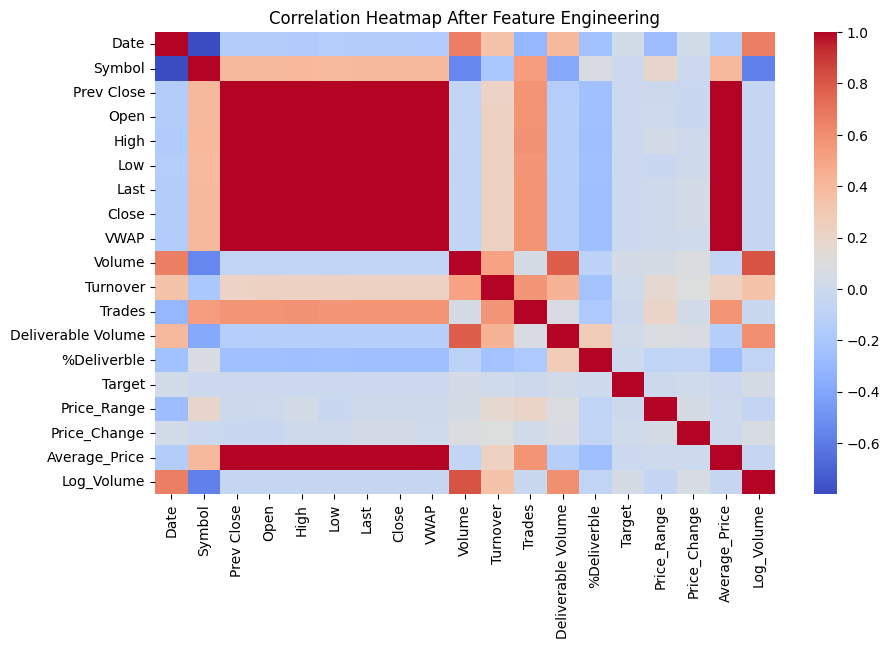

In [106]:
# feture selection
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(new_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap After Feature Engineering')
plt.show()
# If two features have correlation > 0.9, drop one of them to avoid multicollinearity.



# Correlation analysis (drop highly correlated features)
# Variance Threshold (remove columns with very low variance)
# Feature importance from models (RandomForest, XGBoost)
# Recursive Feature Elimination (RFE)


In [107]:
corr_target = new_df.corr(numeric_only=True)['Target'].sort_values(ascending=False)
print(corr_target)
# No column has strong correlation with Target
# So we won’t drop features just because correlation is low


Target                1.000000
Log_Volume            0.045414
Volume                0.038449
Deliverable Volume    0.020335
Turnover              0.014128
Price_Change          0.011974
%Deliverble           0.000796
Price_Range          -0.007008
Trades               -0.007023
Last                 -0.014035
Close                -0.014755
Average_Price        -0.015148
Low                  -0.015226
Open                 -0.015525
VWAP                 -0.015558
High                 -0.015670
Prev Close           -0.016539
Symbol               -0.018203
Name: Target, dtype: float64


In [109]:
import numpy as np

corr_matrix = new_df.corr(numeric_only=True).abs()

# Select only the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation > 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features (corr > 0.9):")
print(high_corr_features)

# Open, High, Low, Close, Last, VWAP, and Average_Price carry almost the same information.
# so we keep close,vwap

Highly correlated features (corr > 0.9):
['Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Average_Price']


Remaining Columns:
 ['Date', 'Symbol', 'Prev Close', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble', 'Target', 'Price_Range', 'Price_Change', 'Log_Volume']


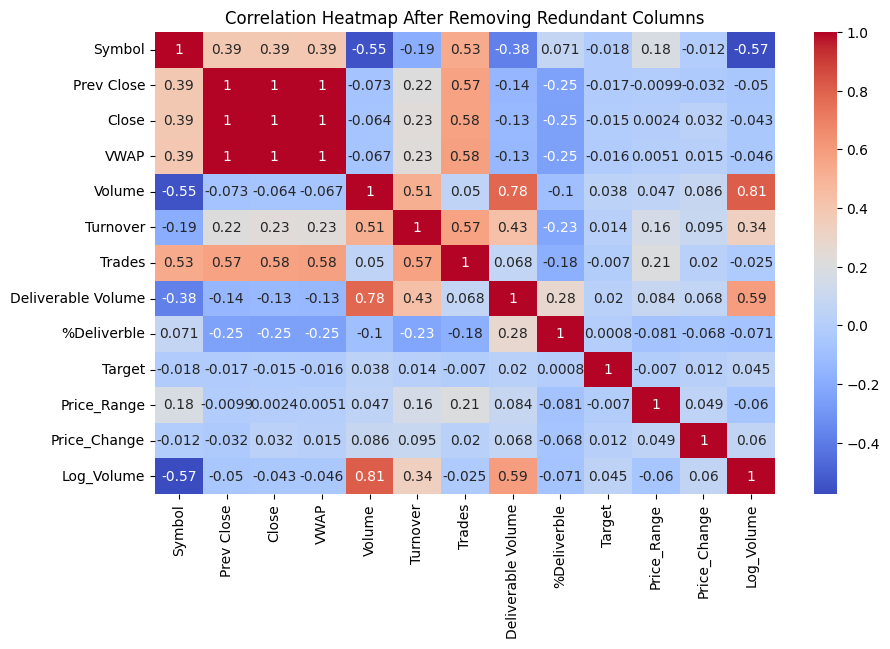

In [110]:
# Drop highly correlated columns (price-related redundancy)
cols_to_drop = ['Open', 'High', 'Low', 'Last', 'Average_Price']
new_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

#  Double-check remaining columns
print("Remaining Columns:\n", new_df.columns.tolist())

# (Optional) Check correlations again for confirmation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap After Removing Redundant Columns')
plt.show()


In [111]:
new_df.head()

,Date,Symbol,Prev Close,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Target,Price_Range,Price_Change,Log_Volume
0,2012-01-17,0,-1.081420,-1.057947,-1.066616,-0.425595,-0.321555,-0.853975,-0.145244,1.046297,1.010896,0.013068,0.014743,-0.554421
1,2012-01-18,0,-1.058092,-1.049140,-1.050518,-0.764706,-0.359728,-0.901781,-0.573869,0.054846,1.010896,0.007554,-0.001761,-1.446918
2,2012-01-19,0,-1.049280,-1.009247,-1.022295,-0.507516,-0.326267,-0.630021,-0.347458,0.309096,1.010896,0.017956,0.027801,-0.708293
3,2012-01-20,0,-1.009364,-0.978161,-0.985971,-0.426562,-0.311936,-0.768015,-0.247632,0.505392,-0.989221,0.015820,0.018079,-0.556106
4,2012-01-23,0,-0.978261,-1.022976,-1.007745,-0.415856,-0.313225,-0.957488,-0.276587,0.306604,1.010896,0.032041,-0.044815,-0.537608


# model building

In [124]:
# Make sure target is integer (0 or 1)
y = y.astype(int)


In [125]:
# Drop Date
X = new_df.drop(columns=['Target', 'Date'])

# Convert categorical Symbol to numeric
if 'Symbol' in X.columns:
    X['Symbol'] = X['Symbol'].astype('category').cat.codes

# Fix Log_Volume missing values
X['Log_Volume'] = X['Log_Volume'].fillna(X['Log_Volume'].median())

# Align target with rows (if any NaN were dropped)
y = new_df['Target'].astype(int)  # ensure integer type

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5082706766917293

Confusion Matrix:
 [[189 147]
 [180 149]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.56      0.54       336
           1       0.50      0.45      0.48       329

    accuracy                           0.51       665
   macro avg       0.51      0.51      0.51       665
weighted avg       0.51      0.51      0.51       665



In [126]:
from sklearn.model_selection import train_test_split

# Drop Date
X = new_df.drop(columns=['Target', 'Date'])

# Convert categorical Symbol to numeric
if 'Symbol' in X.columns:
    X['Symbol'] = X['Symbol'].astype('category').cat.codes

# Handle missing values in Log_Volume
X['Log_Volume'] = X['Log_Volume'].fillna(X['Log_Volume'].median())

# Target as integer
y = new_df['Target'].astype(int)

# Align rows in case any NaNs were dropped
X = X.dropna(subset=['Log_Volume'])
y = y[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [128]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}


In [129]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({"Model": name, "Accuracy": acc, "F1-Score": f1})

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.56      0.54       336
           1       0.50      0.45      0.48       329

    accuracy                           0.51       665
   macro avg       0.51      0.51      0.51       665
weighted avg       0.51      0.51      0.51       665


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       336
           1       0.50      0.49      0.50       329

    accuracy                           0.51       665
   macro avg       0.51      0.51      0.51       665
weighted avg       0.51      0.51      0.51       665


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.58      0.55       336
           1       0.51      0.45      0.48       329

    accuracy                           0.52       665
 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:52:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.50      0.50       336
           1       0.48      0.46      0.47       329

    accuracy                           0.48       665
   macro avg       0.48      0.48      0.48       665
weighted avg       0.48      0.48      0.48       665


AdaBoost Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.53      0.54       336
           1       0.53      0.53      0.53       329

    accuracy                           0.53       665
   macro avg       0.53      0.53      0.53       665
weighted avg       0.53      0.53      0.53       665



In [130]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nModel Comparison:\n")
print(results_df)



Model Comparison:

                 Model  Accuracy  F1-Score
4             AdaBoost  0.532331  0.529501
2    Gradient Boosting  0.515789  0.480645
0  Logistic Regression  0.508271  0.476800
1        Random Forest  0.508271  0.496148
3              XGBoost  0.482707  0.469136


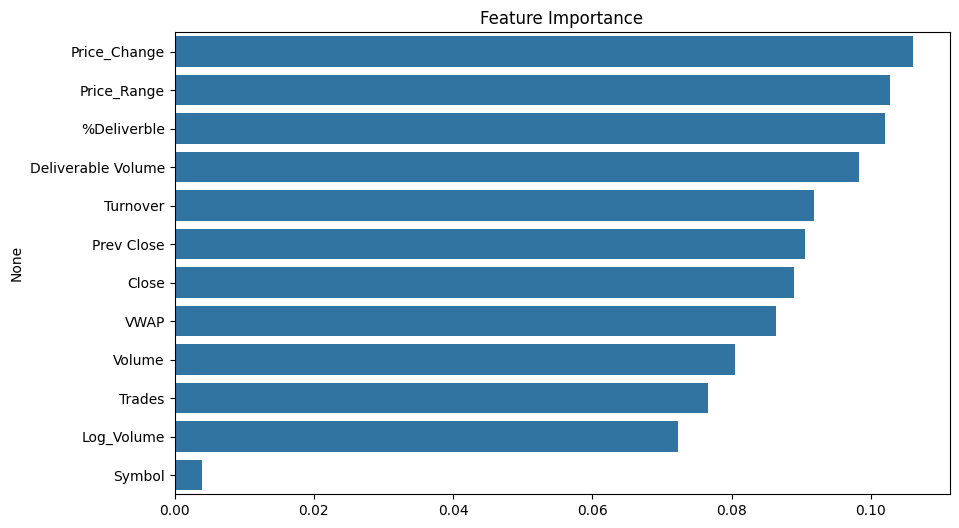

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

best_model = models["Random Forest"]  # example, replace with top performer

if hasattr(best_model, "feature_importances_"):
    feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feat_importances = feat_importances.sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x=feat_importances.values, y=feat_importances.index)
    plt.title("Feature Importance")
    plt.show()


In [132]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [133]:
# Initialize base model
adb = AdaBoostClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [134]:
grid_search = GridSearchCV(
    estimator=adb,
    param_grid=param_grid,
    scoring='accuracy',  # you can also try 'f1'
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

In [135]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best CV Accuracy: 0.5039562182291888


In [136]:
best_adb = grid_search.best_estimator_

y_pred = best_adb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.5263157894736842

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.84      0.64       336
           1       0.56      0.21      0.30       329

    accuracy                           0.53       665
   macro avg       0.54      0.52      0.47       665
weighted avg       0.54      0.53      0.47       665



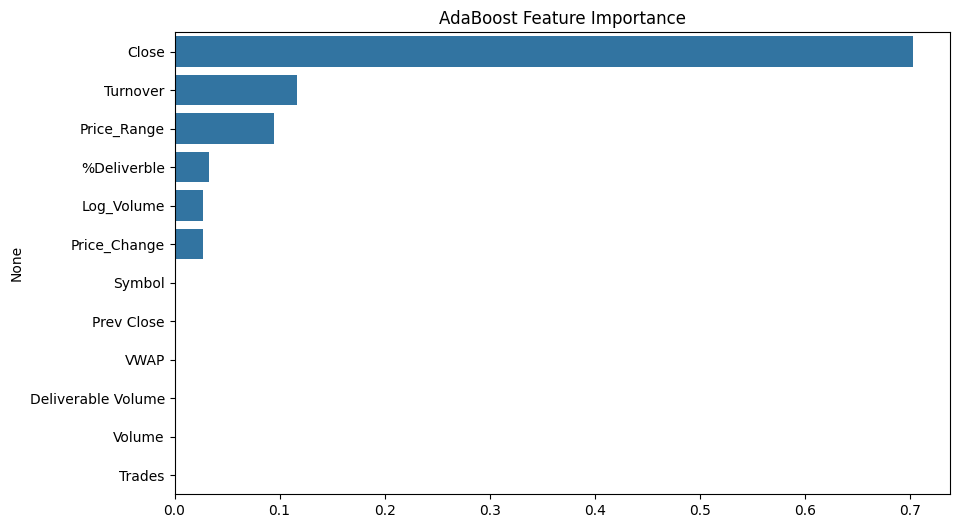

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# AdaBoost provides feature_importances_ like tree-based models
feat_importances = pd.Series(best_adb.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("AdaBoost Feature Importance")
plt.show()


In [138]:
import pickle

# Save as a dictionary
pipeline = {
    'model': best_adb,
    'columns': X.columns.tolist(),
    'median_log_volume': X['Log_Volume'].median(),
    'symbol_mapping': dict(enumerate(X['Symbol'].astype('category').cat.categories))
}

# Save to file
with open('stock_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
